# **Data about coins and bills circulation in Brazil**


***Creating in:*** Brazil, January 2024

***By:*** SRS

 ***Data origin:***  https://dadosabertos.bcb.gov.br/dataset?res_format=API

Comments :
  * every column beginning with ***underline*** is a column created in development

**Information from the official website**

The Central Bank of Brazil (BCB) uses various sources and methods to estimate the quantity of coins and banknotes in circulation in the country. Some of the main methods include:

Production and Destruction Control: The Central Bank is responsible for authorizing the production of new banknotes and coins, as well as the withdrawal of damaged or worn-out notes from circulation. It maintains strict control over these processes.

Electronic Systems and Banks: The BCB uses electronic systems to monitor financial transactions and money movements through banks. Banks provide information on withdrawals and deposits of physical money.

Surveys and Studies: The Central Bank conducts surveys and studies to estimate the amount of money in circulation. This may include conducting surveys on the use of money in daily transactions, the behavior of withdrawals and deposits at ATMs, among others.

Monitoring of Reserves in Commercial Banks: The BCB also monitors the reserves of money held by commercial banks. Banks are required to maintain certain reserve levels, and the Central Bank can use this information to make estimates about the amount of money in circulation.

Economic Data: The BCB also analyzes economic data, such as inflation rates, economic growth, and consumption patterns, to make projections about the demand for physical money.

It is important to note that these estimates are constantly updated as new data becomes available. The Central Bank uses an integrated approach, combining various sources of information to obtain a more comprehensive view of the quantity of coins and banknotes in circulation.

In [22]:
# Import library
import requests
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


# Importing information by API

In [23]:
# Search through an API for available information (using pagination)

df_data_diary = pd.DataFrame()
_skip_index = 0

while True:
    url = f'https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata/informacoes_diarias?$top=10000&$skip={_skip_index}&$format=json'
    _request = requests.get(url)
    _informations = _request.json()
    df_data_diary_temp = pd.DataFrame(_informations["value"])
    if len(_informations['value']) < 1:
        break
    df_data_diary = pd.concat([df_data_diary, df_data_diary_temp])
    _skip_index += 10000

df_data_diary.head(2)

,Data,Quantidade,Valor,Denominacao,Especie
0,1994-10-03,692701959,6927019.59,0.01,Moedas
1,1994-10-03,462277579,23113878.95,0.05,Moedas


In [24]:
# Renaming columns
df_data_diary.columns = ['Date','Quantity','Value','Nominal','Species']
df_data_diary.head(2)


,Date,Quantity,Value,Nominal,Species
0,1994-10-03,692701959,6927019.59,0.01,Moedas
1,1994-10-03,462277579,23113878.95,0.05,Moedas


In [25]:
# Quantity of Lines and columns
print(f'Lines: {df_data_diary.shape[0]} and columns: {df_data_diary.shape[1]}')


Lines: 93077 and columns: 5


In [26]:
# Dataset structure
df_data_diary.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 93077 entries, 0 to 3076
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      93077 non-null  object 
 1   Quantity  93077 non-null  int64  
 2   Value     93077 non-null  float64
 3   Nominal   93077 non-null  object 
 4   Species   93077 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ MB


# Data Wrangling

In [27]:
# Created a copy of the data
df_diary = df_data_diary


In [28]:
# Missing values
df_diary.isnull().sum()


Date        0
Quantity    0
Value       0
Nominal     0
Species     0
dtype: int64

In [29]:
# Converting the informations about date
_Date = pd.to_datetime(df_diary['Date'])

# Creating columns for the day, month and year
df_diary['_Year']   = _Date.dt.year
df_diary['_Month']  = _Date.dt.month
df_diary['_Day']    = _Date.dt.day

# Converting values divided by one million
df_diary['_Nominal'] = df_diary['Nominal'].astype(float)
df_diary['_Value']   =  (((df_diary['_Nominal']) * (df_diary['Quantity'])) / 1000000).round(5) # 10 million

df_diary.head(2)



,Date,Quantity,Value,Nominal,Species,_Year,_Month,_Day,_Nominal,_Value
0,1994-10-03,692701959,6927019.59,0.01,Moedas,1994,10,3,0.01,6.92702
1,1994-10-03,462277579,23113878.95,0.05,Moedas,1994,10,3,0.05,23.11388


In [30]:
# Export dataframe
#df_data_diary.to_csv('df_data_diary.csv', index=False)

In [31]:
# Substituting the values in the column according to the conditions
df_data_diary['_Species'] = df_data_diary['Species'].replace({'Moedas': 'Coin', 'Cédulas': 'Paper'})
df_data_diary.head()


,Date,Quantity,Value,Nominal,Species,_Year,_Month,_Day,_Nominal,_Value,_Species
0,1994-10-03,692701959,6.927020e+06,0.01,Moedas,1994,10,3,0.01,6.92702,Coin
1,1994-10-03,462277579,2.311388e+07,0.05,Moedas,1994,10,3,0.05,23.11388,Coin
2,1994-10-03,404559065,4.045591e+07,0.10,Moedas,1994,10,3,0.10,40.45591,Coin
3,1994-10-03,1492870,3.732175e+05,0.25,Moedas,1994,10,3,0.25,0.37322,Coin
4,1994-10-03,278901842,1.394509e+08,0.50,Moedas,1994,10,3,0.50,139.45092,Coin


In [32]:
# Dataset structure (new)
df_diary.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 93077 entries, 0 to 3076
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      93077 non-null  object 
 1   Quantity  93077 non-null  int64  
 2   Value     93077 non-null  float64
 3   Nominal   93077 non-null  object 
 4   Species   93077 non-null  object 
 5   _Year     93077 non-null  int64  
 6   _Month    93077 non-null  int64  
 7   _Day      93077 non-null  int64  
 8   _Nominal  93077 non-null  float64
 9   _Value    93077 non-null  float64
 10  _Species  93077 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 8.5+ MB


# Data exploration

In [33]:
# New dataset with grouping by Species, Nominal, Year and Month
df_group = df_diary.groupby(['_Species','_Nominal', '_Year', '_Month']).agg({'_Value': 'sum'}).reset_index()
df_group.head(5)


,_Species,_Nominal,_Year,_Month,_Value
0,Coin,0.01,1994,10,145.71546
1,Coin,0.01,1994,11,152.66214
2,Coin,0.01,1994,12,180.53610
3,Coin,0.01,1995,1,186.03689
4,Coin,0.01,1995,2,168.25894


In [34]:
#
df_Coin_001 = df_group.loc[(df_group.loc[:,'_Species'] == 'Coin' ) & (df_group.loc[:,'_Nominal'] == 0.01) & (df_group.loc[:,'_Year'] >= 1995) & (df_group.loc[:,'_Year'] < 2024)]
df_Coin_001


,_Species,_Nominal,_Year,_Month,_Value
3,Coin,0.01,1995,1,186.03689
4,Coin,0.01,1995,2,168.25894
5,Coin,0.01,1995,3,221.80127
6,Coin,0.01,1995,4,168.93178
7,Coin,0.01,1995,5,223.42842
...,...,...,...,...,...
346,Coin,0.01,2023,8,733.93115
347,Coin,0.01,2023,9,638.20100
348,Coin,0.01,2023,10,670.11105
349,Coin,0.01,2023,11,638.20100


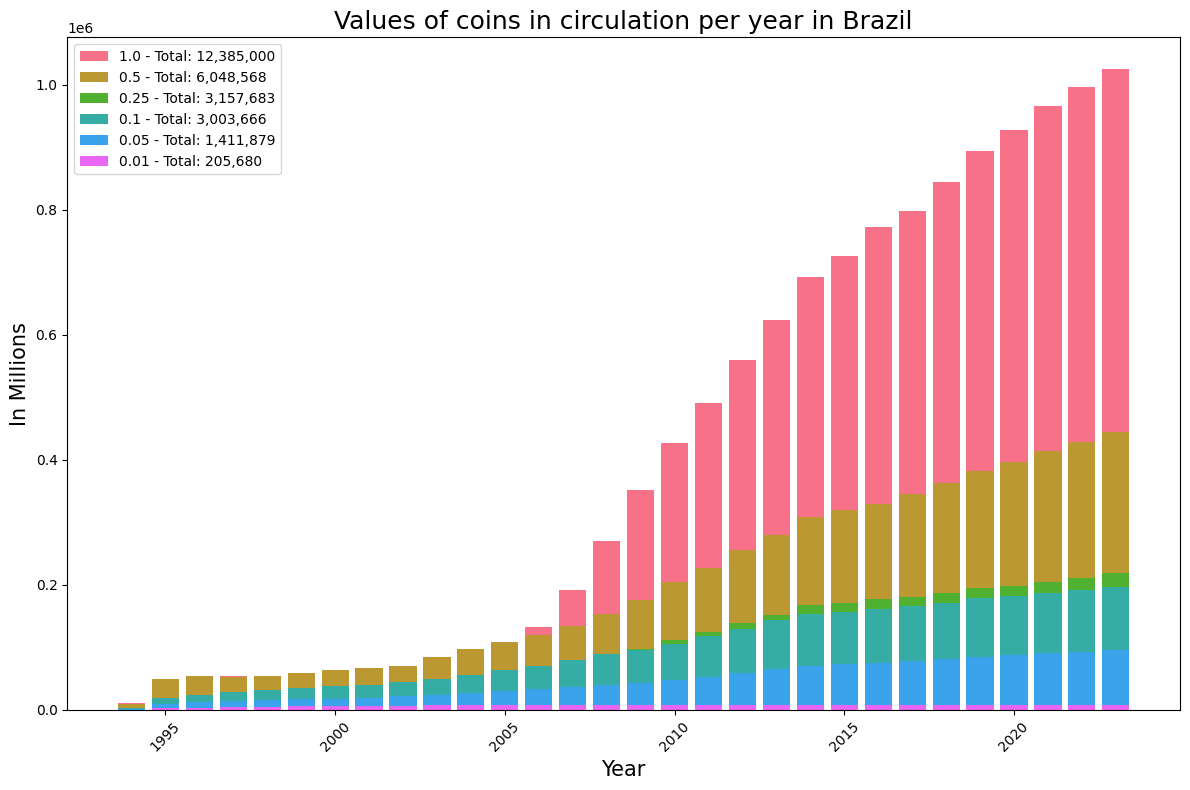

In [35]:
# Filtre os dados
_Coin_by_Year= df_diary.loc[(df_diary.loc[:, '_Species'] == 'Coin') & (df_diary.loc[:, '_Year'] < 2024)]

# Calcule o total de valores para cada moeda em cada ano
total_values = _Coin_by_Year.groupby(['_Nominal', '_Year'])['_Value'].sum().reset_index()

# Ordene as moedas pelo total de valores em cada ano, do maior para o menor
sorted_moedas = total_values.groupby('_Year')['_Nominal'].apply(lambda x: x.sort_values(ascending=False)).reset_index(drop=True)

# Função para criar o gráfico com opção de troca de paleta de cores e legendas com valores
def criar_grafico(paleta_cores):
    fig, ax = plt.subplots(figsize=(12, 8))

    for i, moeda in enumerate(sorted_moedas.unique()):
        dados_moeda = total_values[total_values['_Nominal'] == moeda]
        ax.bar(dados_moeda['_Year'], dados_moeda['_Value'], label=f'{moeda} - Total: {dados_moeda["_Value"].sum():,.0f}', color=paleta_cores[i])

    ax.set_xlabel('Year', size=15)
    ax.set_ylabel('In Millions', size=15)
    ax.set_title('Values of coins in circulation per year in Brazil', size=18)
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

# Paleta de cores padrão do seaborn
paleta_cores_padrao = sns.color_palette("husl", n_colors=len(sorted_moedas.unique()))

# Criar gráfico com paleta de cores padrão
criar_grafico(paleta_cores_padrao)

# Opção para trocar a paleta de cores
#nova_paleta_cores = sns.color_palette("deep", n_colors=len(sorted_moedas.unique()))
#criar_grafico(nova_paleta_cores)